## 3.2 Further Analytics

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Load Data into Jupyter Notebook

In [2]:
listoforder = pd.read_csv('List of Orders.csv')
orderdetails = pd.read_csv('Order Details.csv')
salestarget = pd.read_csv('Sales target.csv')

In [3]:
listoforder.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad
1,B-25602,1/4/2018,Pearl,Maharashtra,Pune
2,B-25603,3/4/2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,3/4/2018,Divsha,Rajasthan,Jaipur
4,B-25605,5/4/2018,Kasheen,West Bengal,Kolkata


In [4]:
orderdetails.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


In [5]:
salestarget.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [6]:
listoforder = pd.DataFrame(listoforder)
orderdetails = pd.DataFrame(orderdetails)

In [7]:
merged_data = pd.merge(listoforder, orderdetails, on='Order ID')

In [8]:
merged_data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,1/4/2018,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,30/3/2019,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones
1496,B-26099,30/3/2019,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers
1497,B-26100,31/3/2019,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs
1498,B-26100,31/3/2019,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt


In [9]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'], format='%d/%m/%Y')

In [10]:
merged_data['Order Year'] = merged_data['Order Date'].dt.year
merged_data['Order Month'] = merged_data['Order Date'].dt.month
merged_data['Order Day'] = merged_data['Order Date'].dt.day

merged_data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Order Year,Order Month,Order Day
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,4,1
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,4,1
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,4,1
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,4,1
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31


## Arima (forecast prediction)

In [11]:
Sales_info = merged_data.groupby(['Order Year', 'Order Month'])['Amount'].sum().reset_index()
Sales_info['Order Date'] = Sales_info.apply(lambda row: f"{int(row['Order Year'])}-{int(row['Order Month'])}-01", axis=1)
Sales_info['Order Date'] = pd.to_datetime(Sales_info['Order Date'])
Sales_info.drop(['Order Year', 'Order Month'], axis=1, inplace=True)
Sales_info.set_index('Order Date', inplace=True)

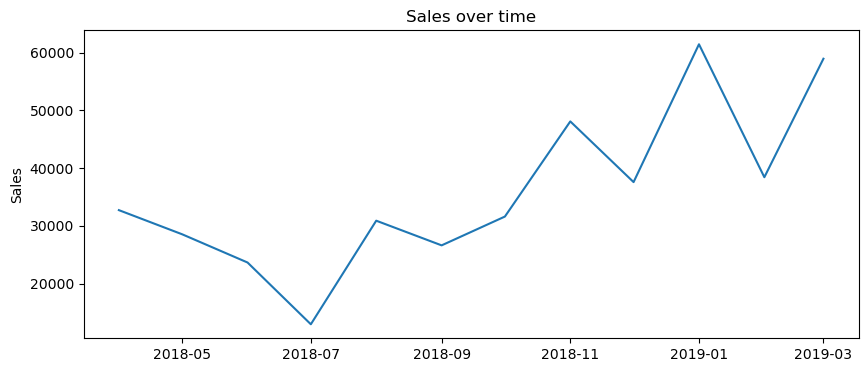

In [12]:
plt.figure(figsize=(10,4))
plt.plot(Sales_info)
plt.title("Sales over time")
plt.ylabel("Sales")
plt.show()

In [13]:
Pvalue = adfuller(Sales_info)[1]

if Pvalue > 0.05:
    print(f"p-value: {Pvalue}, non stationary")
else:
    print(f"p-value: {Pvalue}, stationary")

p-value: 0.41951910523040037, non stationary


In [14]:
Sales_info['Sales_Detrend'] = Sales_info['Amount'] - Sales_info['Amount'].shift(1)
Sales_info = Sales_info.dropna()

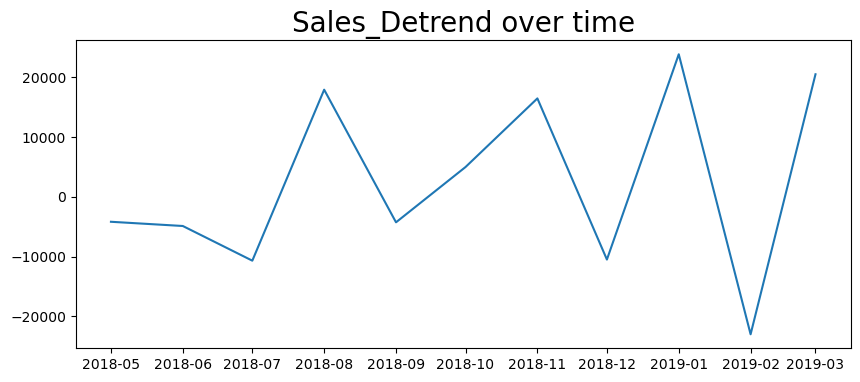

In [15]:
plt.figure(figsize=(10,4))
plt.plot(Sales_info['Sales_Detrend'])
plt.title("Sales_Detrend over time", fontsize=20)
plt.show()

In [16]:
Pvalue = adfuller(Sales_info['Sales_Detrend'])[1]

if Pvalue > 0.05:
    print(f"p-value: {Pvalue}, non stationary")
else:
    print(f"p-value: {Pvalue}, stationary")

p-value: 0.16998347118527402, non stationary


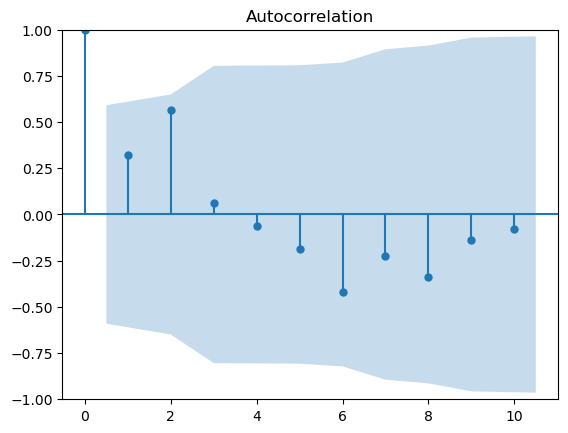

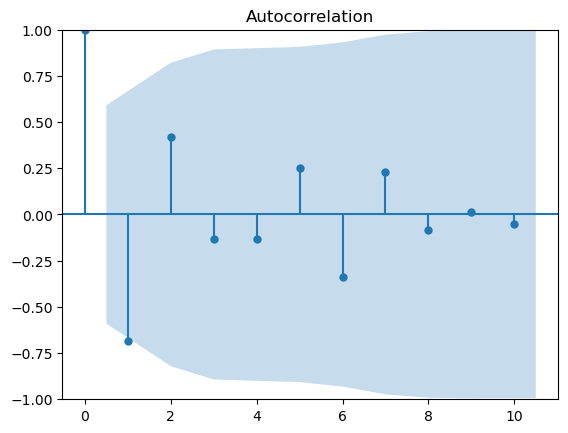

In [17]:
acf_plot_sales = plot_acf(Sales_info.Amount)
acf_plot_sales_detrended = plot_acf(Sales_info.Sales_Detrend)

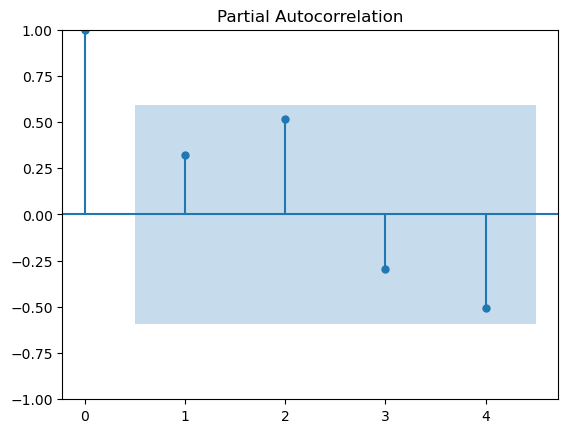

In [18]:
pacf_plot_sales = plot_pacf(Sales_info.Amount, lags=4)

In [19]:
# p=4 since its closer to 0, q=1 since its also closer to 0
arima = ARIMA(Sales_info['Amount'], order=[4,0,1])
model = arima.fit()

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                   11
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -111.942
Date:                Sun, 11 Aug 2024   AIC                            237.885
Time:                        04:54:43   BIC                            240.670
Sample:                    05-01-2018   HQIC                           236.129
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.625e+04   1944.769     18.641      0.000    3.24e+04    4.01e+04
ar.L1          0.2247      0.562      0.400      0.689      -0.877       1.326
ar.L2          1.0218      0.317      3.223      0.001       0.401       1.643
ar.L3         -0.1122      0.701     -0.160      0.873      -1.486       1.261
ar.L4         -0.7930      0.661     -1.199      0.231      -2.089       0.503
ma.L1         -0.8160      1.602     -0.509      0.611      -3.956       2.324
sigma2      2.598e+07      0.049   5.31e+08      0.000     2.6e+07     2.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.54   Prob(JB):                         0.84
Heteroskedasticity (H):               0.41   Skew:                             0.19
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.69e+24. Standard errors may be unstable.
"""

In [21]:
in_sample_pred = model.predict(start=0, end=len(Sales_info['Amount'])-1, dynamic=False)

In [22]:
forecast = model.forecast(steps=len(Sales_info['Amount']))

In [23]:
forecast_dates = list(forecast.index)
forecast_values = list(forecast.values)

forecast_dates.insert(0, in_sample_pred.index[-1])
forecast_values.insert(0, in_sample_pred.values[-1])

predictions = pd.DataFrame({'values':in_sample_pred.values}, index = in_sample_pred.index)
forecasts = pd.DataFrame({'values':forecast_values}, index=forecast_dates)

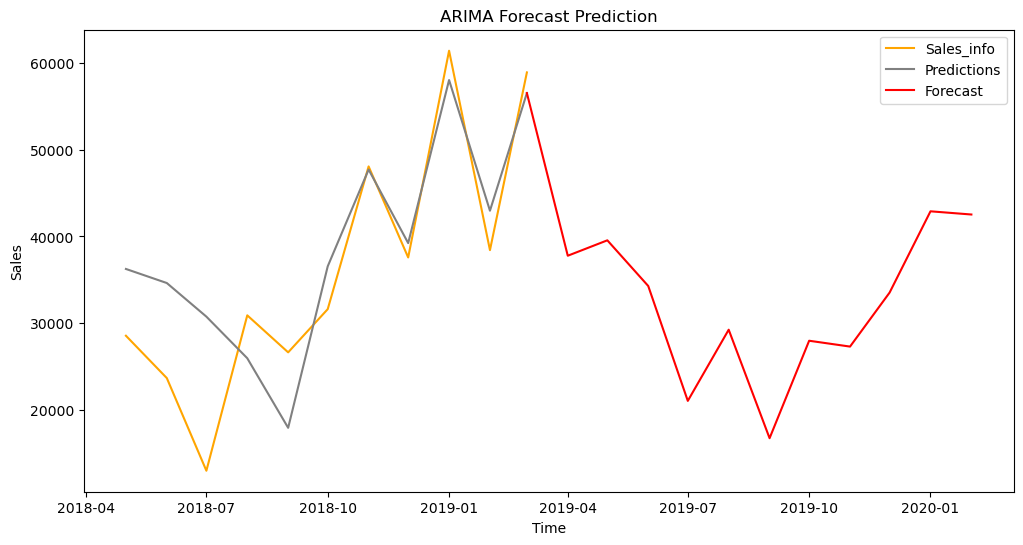

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(Sales_info['Amount'], label='Sales_info',color='orange')
plt.plot(predictions, label='Predictions', color='grey')
plt.plot(forecasts, label='Forecast', color='red')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('ARIMA Forecast Prediction')
plt.legend()
plt.show()

## CMA & TMA for Profit and Sales

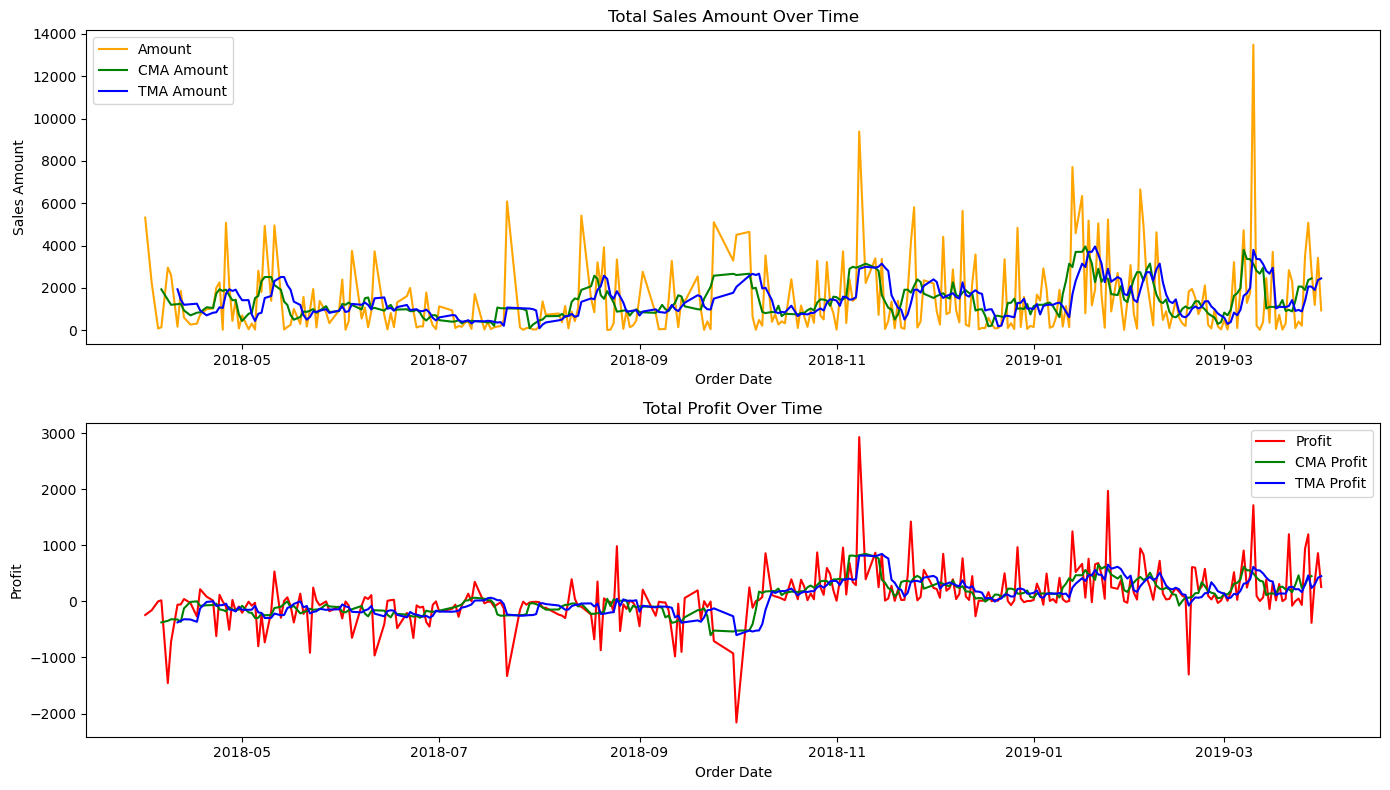

In [25]:
time_series_data = merged_data.groupby(['Order Year', 'Order Month', 'Order Day']).agg({'Amount': 'sum', 'Profit': 'sum'}).reset_index()

time_series_data['Order Date'] = time_series_data.apply(lambda row: f"{int(row['Order Year'])}-{int(row['Order Month'])}-{int(row['Order Day'])}", axis=1)

time_series_data['Order Date'] = pd.to_datetime(time_series_data['Order Date'])

window_size = 7

# Calculate Cumulative Moving Average (CMA)
time_series_data['CMA_Amount'] = time_series_data['Amount'].rolling(window=window_size, center = True).mean()
time_series_data['CMA_Profit'] = time_series_data['Profit'].rolling(window=window_size, center = True).mean()

# Calculate Trailing Moving Average (TMA)
time_series_data['TMA_Amount'] = time_series_data['Amount'].rolling(window=window_size).mean()
time_series_data['TMA_Profit'] = time_series_data['Profit'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(time_series_data['Order Date'], time_series_data['Amount'], color='orange', label='Amount')
plt.plot(time_series_data['Order Date'], time_series_data['CMA_Amount'], label='CMA Amount', color='green')
plt.plot(time_series_data['Order Date'], time_series_data['TMA_Amount'], label='TMA Amount', color='blue')
plt.title('Total Sales Amount Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_series_data['Order Date'], time_series_data['Profit'], color='red', label='Profit')
plt.plot(time_series_data['Order Date'], time_series_data['CMA_Profit'], label='CMA Profit', color='green')
plt.plot(time_series_data['Order Date'], time_series_data['TMA_Profit'], label='TMA Profit', color='blue')
plt.title('Total Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
time_series_data.head()

,Order Year,Order Month,Order Day,Amount,Profit,Order Date,CMA_Amount,CMA_Profit,TMA_Amount,TMA_Profit
0,2018,4,1,5318,-243,2018-04-01,NaN,NaN,NaN,NaN
1,2018,4,3,2247,-158,2018-04-03,NaN,NaN,NaN,NaN
2,2018,4,5,75,0,2018-04-05,NaN,NaN,NaN,NaN
3,2018,4,6,137,19,2018-04-06,1929.285714,-374.142857,NaN,NaN
4,2018,4,8,2953,-1456,2018-04-08,1435.571429,-347.285714,NaN,NaN


### K-means clustering

In [27]:
merged_data['Gross Margin'] = merged_data['Profit'] / merged_data['Amount']
merged_data['UniqueCustomer'] = merged_data['CustomerName'] + "," + merged_data['State'] + "," + merged_data['City']

In [28]:
merged_data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Order Year,Order Month,Order Day,Gross Margin,UniqueCustomer
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,4,1,-0.900392,"Bharat,Gujarat,Ahmedabad"
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,4,1,-0.181818,"Bharat,Gujarat,Ahmedabad"
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,4,1,-0.250000,"Bharat,Gujarat,Ahmedabad"
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,4,1,-0.700000,"Bharat,Gujarat,Ahmedabad"
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,4,1,-0.660714,"Pearl,Maharashtra,Pune"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30,0.319760,"Bhishm,Maharashtra,Mumbai"
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30,0.233305,"Bhishm,Maharashtra,Mumbai"
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31,0.277778,"Hitika,Madhya Pradesh,Indore"
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31,0.294118,"Hitika,Madhya Pradesh,Indore"


In [29]:
customer_data = merged_data.groupby(['UniqueCustomer','Category']).agg({
    'Gross Margin': 'mean',  
    'Amount': 'sum'  
}).reset_index()

In [30]:
customer_data

,UniqueCustomer,Category,Gross Margin,Amount
0,"Aakanksha,Madhya Pradesh,Indore",Clothing,-0.363636,33
1,"Aakanksha,Madhya Pradesh,Indore",Furniture,-0.146341,41
2,"Aarushi,Tamil Nadu,Chennai",Clothing,0.045327,1151
3,"Aarushi,Tamil Nadu,Chennai",Electronics,0.224883,1025
4,"Aarushi,Tamil Nadu,Chennai",Furniture,-0.494963,2525
...,...,...,...,...
673,"Yogesh,Bihar,Patna",Furniture,-0.166667,30
674,"Yogesh,Madhya Pradesh,Indore",Clothing,0.343750,64
675,"Yogesh,Madhya Pradesh,Indore",Electronics,0.428571,231
676,"Yogesh,Madhya Pradesh,Indore",Furniture,0.055410,2292


In [31]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(customer_data[['Gross Margin', 'Amount']])

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [33]:
scaled_customer_df = pd.DataFrame(scaled_data, columns=['Gross Margin', 'Amount'])

scaled_customer_df['Cluster'] = kmeans.labels_

scaled_customer_data = scaler.inverse_transform(scaled_customer_df[['Gross Margin', 'Amount']])
scaled_customer_df[['Gross Margin', 'Amount']] = scaled_customer_data

In [34]:
scaled_customer_df.head()

,Gross Margin,Amount,Cluster
0,-0.363636,33.0,0
1,-0.146341,41.0,0
2,0.045327,1151.0,1
3,0.224883,1025.0,1
4,-0.494963,2525.0,2


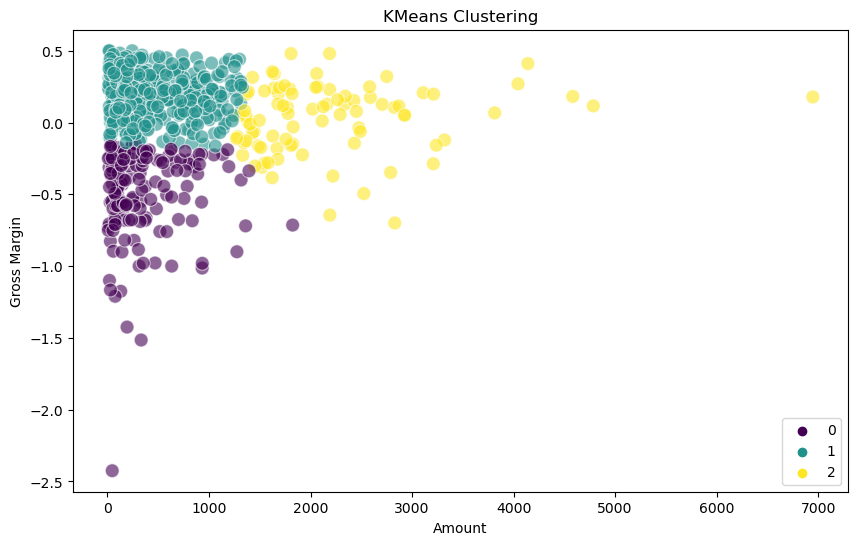

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scaled_customer_df,
    x='Amount',
    y='Gross Margin',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.6
)

plt.title('KMeans Clustering')
plt.xlabel('Amount')
plt.ylabel('Gross Margin')
plt.legend()
plt.show()

In [36]:
for cluster in range(3):
    clustered = scaled_customer_df[scaled_customer_df['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(clustered.describe())
    print("\n")

Cluster 0 Summary:
       Gross Margin       Amount  Cluster
count    161.000000   161.000000    161.0
mean      -0.486367   338.279503      0.0
std        0.313626   350.827098      0.0
min       -2.425532     8.000000      0.0
25%       -0.657895    76.000000      0.0
50%       -0.413889   213.000000      0.0
75%       -0.257343   490.000000      0.0
max       -0.146341  1824.000000      0.0


Cluster 1 Summary:
       Gross Margin       Amount  Cluster
count    430.000000   430.000000    430.0
mean       0.187725   434.027907      1.0
std        0.148721   356.693157      0.0
min       -0.164628    12.000000      1.0
25%        0.089638   146.250000      1.0
50%        0.191510   313.000000      1.0
75%        0.302899   698.750000      1.0
max        0.500000  1328.000000      1.0


Cluster 2 Summary:
       Gross Margin       Amount  Cluster
count     87.000000    87.000000     87.0
mean       0.025629  2188.586207      2.0
std        0.235852   921.923186      0.0
min       -0.70

## Univariate analysis

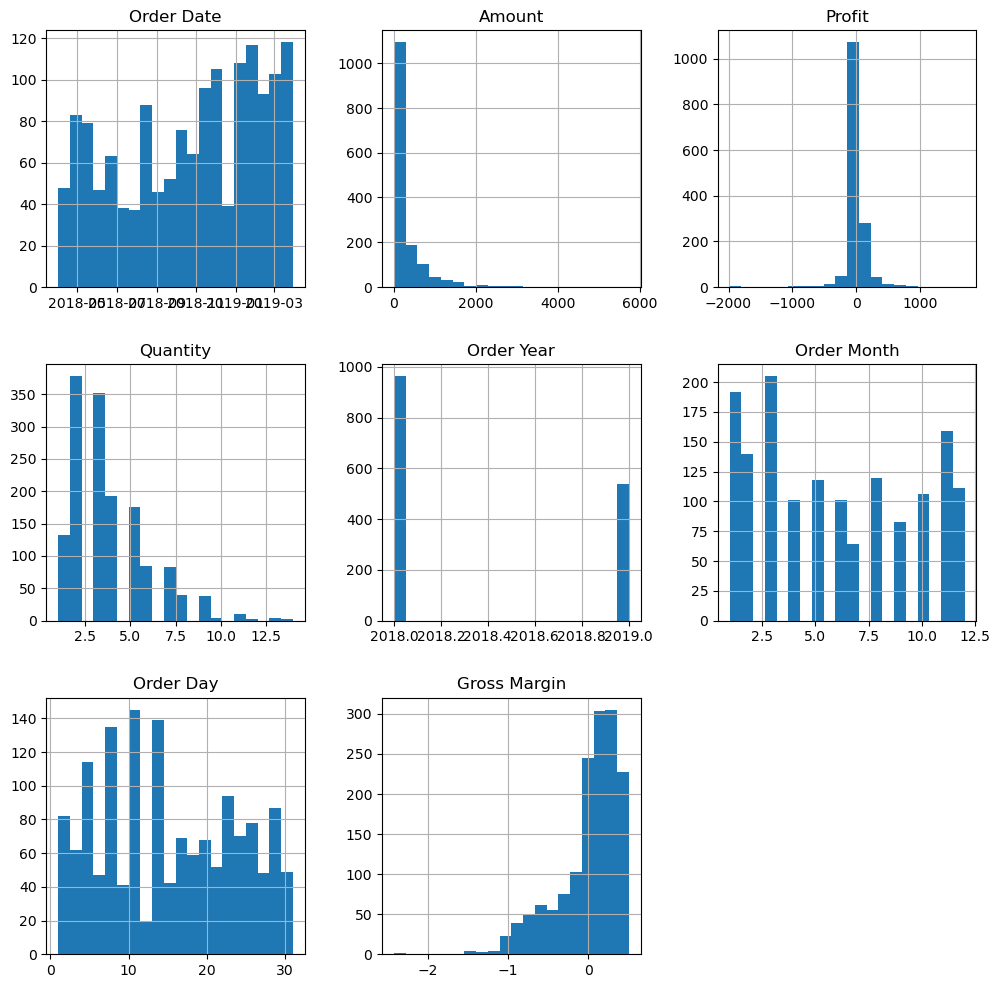

In [37]:
num_cols = [c for c in merged_data.columns if merged_data[c].dtypes != 'O']
merged_data[num_cols].hist(bins=20, figsize=(12,12))
plt.show()

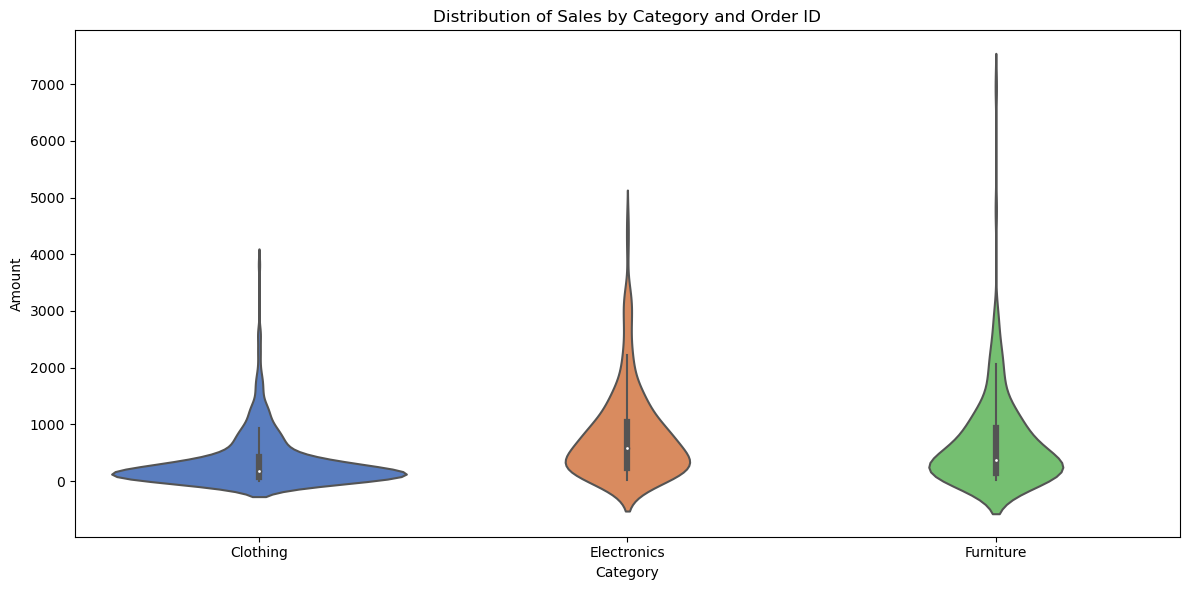

In [38]:
grouped_data = merged_data.groupby(['Category', 'Order ID']).agg({'Amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='Amount', data=grouped_data, palette='muted')

plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Distribution of Sales by Category and Order ID')
plt.tight_layout()

plt.show()

## Bivariate Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_7324\1000670651.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


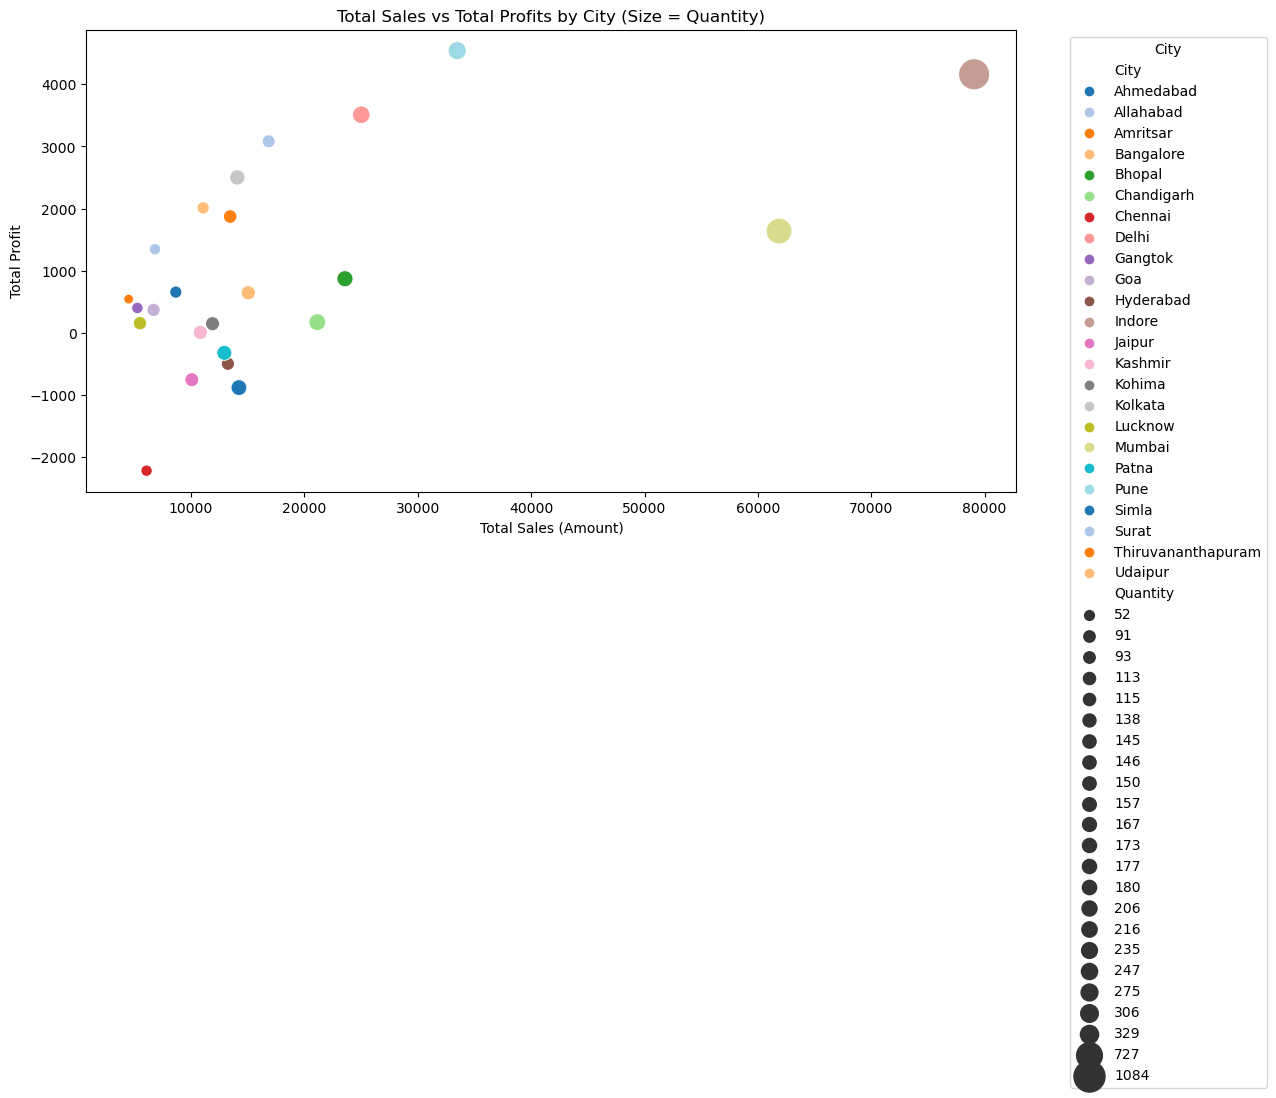

In [39]:
aggregated_data = merged_data.groupby('City').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

unique_cities = aggregated_data['City'].unique()
palette = sns.color_palette("tab20", len(unique_cities))  
city_palette = dict(zip(unique_cities, palette))

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Amount', 
    y='Profit', 
    size='Quantity', 
    hue='City', 
    data=aggregated_data, 
    palette=city_palette,  
    sizes=(50, 500),  
    legend='full'
)

plt.xlabel('Total Sales (Amount)')
plt.ylabel('Total Profit')
plt.title('Total Sales vs Total Profits by City (Size = Quantity)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<Axes: >

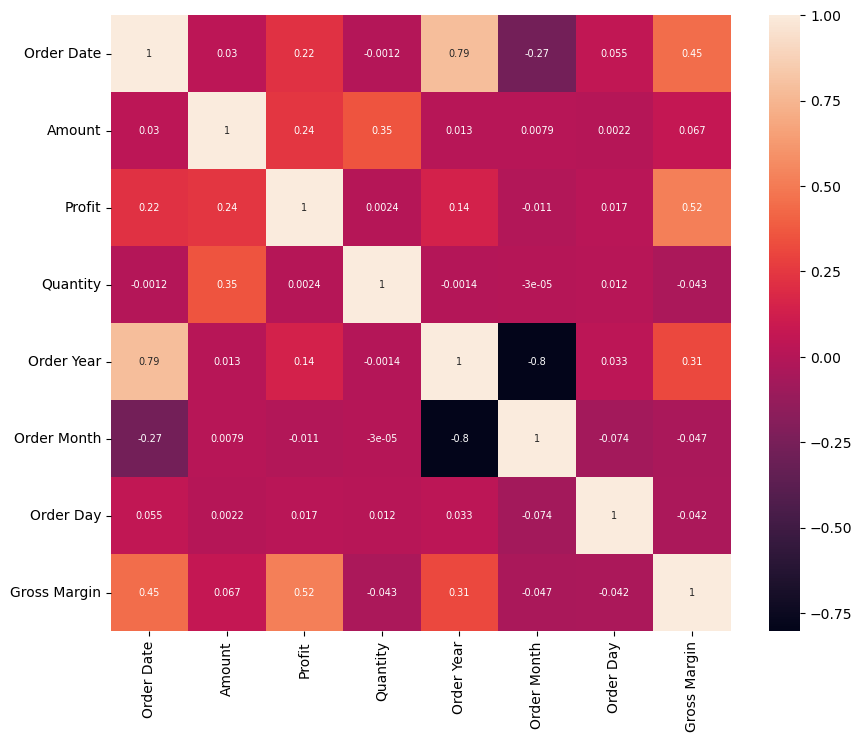

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(data = merged_data[num_cols].corr(), annot=True, annot_kws={"size": 7})